In [208]:
from PIL import Image
from scipy.ndimage.filters import median_filter
import numpy as np
import os
import matplotlib.pyplot as plt

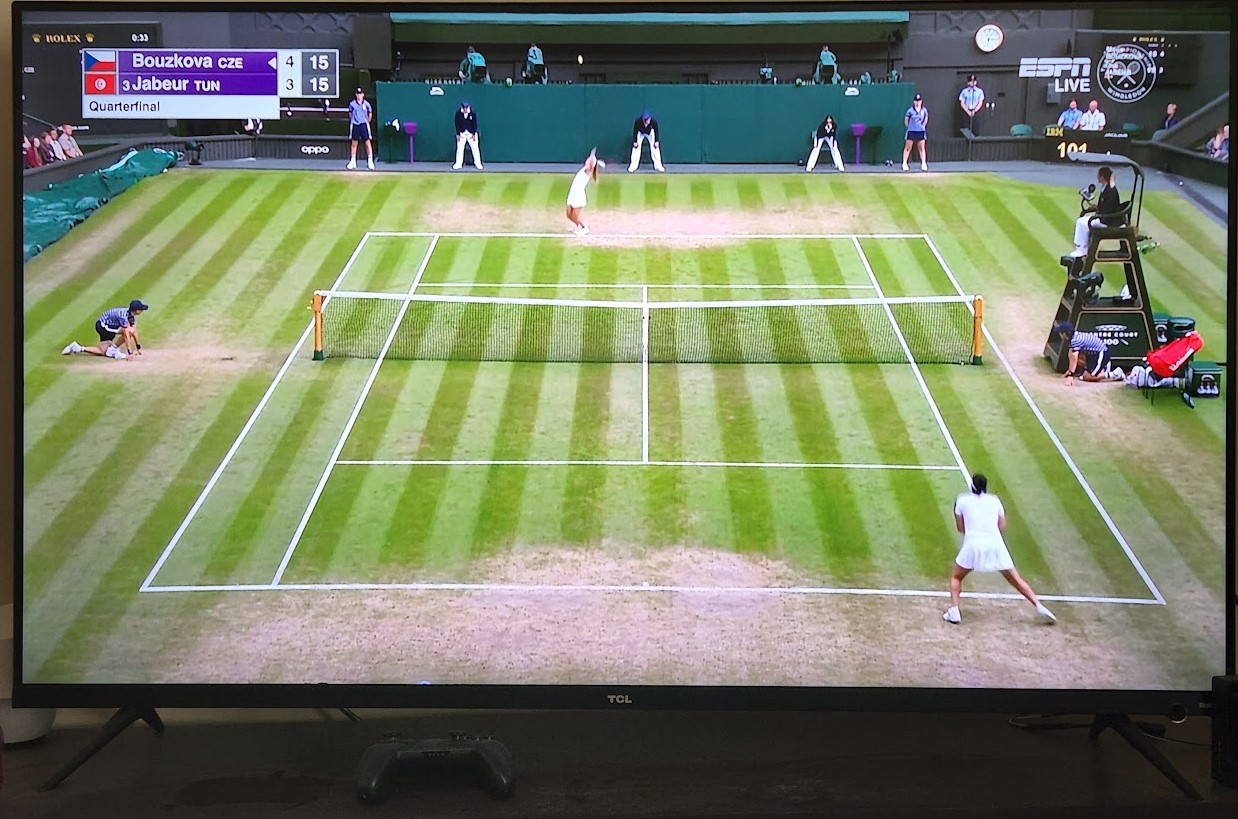

In [12]:
#read in image of Wimbledon match 

#Open image using Image module
im = Image.open("../Data/wimbledon.jpg")
#Show actual Image
im

In [21]:
#Observe the image shape
im_array = np.array(im)
im_array.shape

(819, 1238, 3)

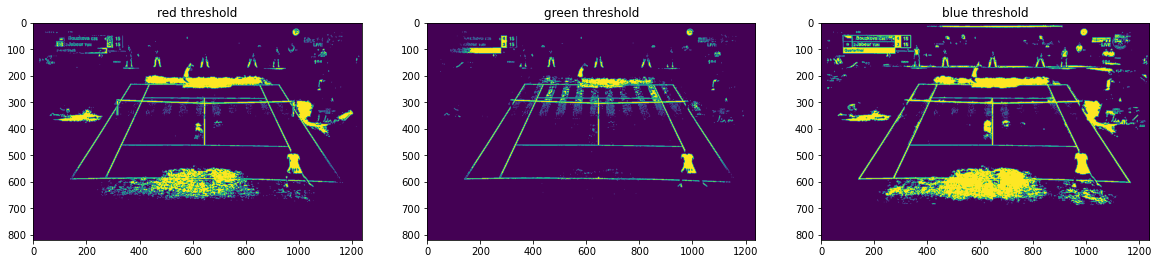

In [195]:
#Test out a couple thresholds and visualize which pixels are "True" or yellow
red_thresh = im_array[:,:,0] > 210
green_thresh = im_array[:,:,1] > 220
blue_thresh = im_array[:,:,2] > 180

# Show subplots | shape: (1,3) 
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(20,6))

#Take and plot thresh, axis, and color
for thresh, ax, color in zip((red_thresh, green_thresh, blue_thresh), axs.ravel(), ['red','green','blue']):
    ax.imshow(thresh)
    ax.set_title("%s threshold" % (color))


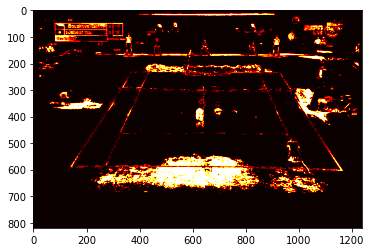

In [209]:
#Green appears to have the least dirt after thresholding
#Use the blue threshold as a mask to remove most of the court
masked_green = np.invert(green_thresh) * blue_thresh

#Create a heat map
plt.imshow(masked_green, cmap = 'hot')
plt.show()

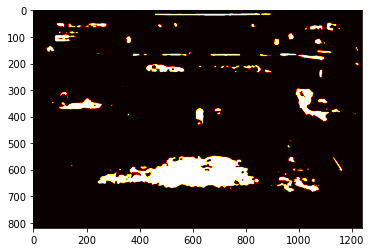

In [219]:
#Try to remove more of the court and players through filtering
filtered_image = median_filter(masked_green, size = (9,9))
plt.imshow(filtered_image, cmap = 'hot')
plt.show()

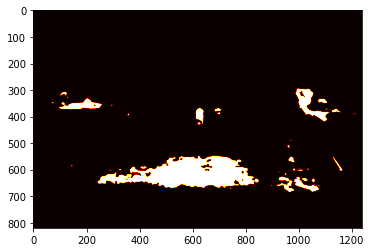

In [220]:
#lastly, filter out all values above a certain y value
filtered_image[:290,:] = 0

plt.imshow(filtered_image, cmap = 'hot')
plt.show()